# GRAPHICAL PRESENTATIONS OF DATA
by Gary T. Banta (original) and Ulf R. Pedersen (notebook version).

Last time you were introduced to where data comes from and given some ideas about how to
describe or categorize it. You learned about various types of data (numerical, categorical, etc.).
You also were challenged to consider the origin and design behind the collection of data (i.e.,
from an experiment or observational study, etc.). The purpose of this chapter is to introduce you
to some graphical techniques that will help you describe and display data.

## Ways to graphically summarize data
One of the greatest challenges once you have collected data is how to describe or summarize
such data. There are a number of mathematical or statistical methods for calculating various
parameters (e.g., mean, standard deviation, etc.) from the data set. But before proceeding with
such mathematical calculations, it is also useful to use graphical techniques to display and get a
picture of one’s data. Such graphical techniques are quite usefully and are an essential step in
what is called **exploratory data analysis**. That means, more or less, trying to make sense out of
your data. The types of graphical (and mathematical) techniques that are useful are of course
dependent on the type of data collected; i.e., what type of variable are we trying to display.

When dealing with categorical (including ordinal) data, an obvious approach is to count up the
number of observations, i.e., the frequency, in each category. Such a **frequency distribution** can
then be summarized in either table or graph format. A common type of graph to show a
observations in a category. For example, the number of poinsettia flowers that were observed to
be red, pink or white after crossing a red flower with a white flow are summarized in Table 1 and
Figure 1.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

table_1 = pd.DataFrame(
    index = ['Red','Pink','White'],
    data = {'Frequency': [108, 40, 34]}
)

print('Total number of observations:',
      table_1['Frequency'].sum())

table_1

Total number of observations: 182


Frequency
Red          108
Pink          40
White         34

<Figure size 432x288 with 0 Axes>

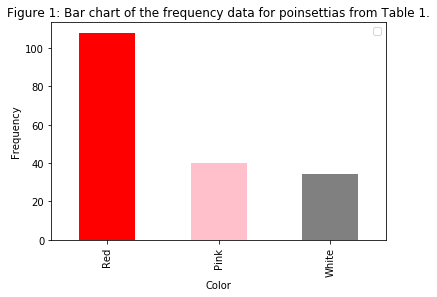

In [2]:
plt.figure()
table_1.plot.bar(y='Frequency',
                 color=['red','pink','gray'])
plt.title('Bar chart of the frequency data for poinsettias')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.legend([])
plt.show()

A horisital 

The scale of the bar chart is typically frequency, but it can also be recalculated to
relative frequency (i.e., the fraction of all observations between 0 and 1.0) or percent (again of all
observations (0-100%). In Figure 2, the same poinsettia data is displayed using all three scales.
While the scale changes, the picture and thus our insights into the data do not.

<Figure size 432x288 with 0 Axes>

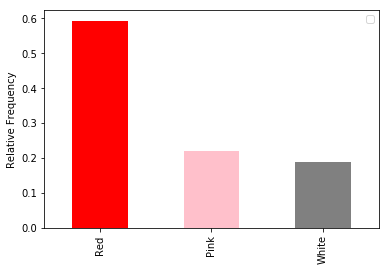

Frequency  Relative Frequency
Red          108            0.593407
Pink          40            0.219780
White         34            0.186813

In [3]:
relative_frequency = table_1['Frequency']/table_1['Frequency'].sum()
table_1['Relative Frequency'] = relative_frequency

plt.figure()
table_1.plot.bar(y='Relative Frequency',
                 color=['red','pink','gray'])
plt.ylabel('Relative Frequency')
plt.legend([])
plt.show()

table_1

<Figure size 432x288 with 0 Axes>

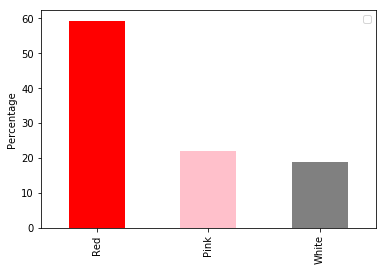

Frequency  Relative Frequency    Percent
Red          108            0.593407  59.340659
Pink          40            0.219780  21.978022
White         34            0.186813  18.681319

In [28]:
percent = relative_frequency*100
table_1['Percent'] = percent
plt.figure()
table_1.plot.bar(y='Percent',
                 color=['red','pink','gray'])
plt.ylabel('Percentage')
plt.legend([])
plt.show()
table_1

The same information can be shown in a pie chart.

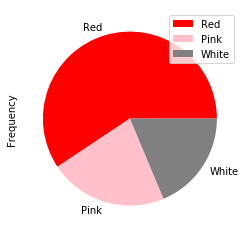

In [5]:
table_1.plot.pie(
    y='Frequency',
    colors=['red','pink','gray']
)

With Pandas, a Series can be created by counting values using the `value_counts()` method.

In [6]:
df = pd.DataFrame({
    "colors": ['Red','Pink','Red','White','Pink','Red','Pink','Red','','Red']
})
color_counts = df['colors'].value_counts()
color_counts

Red      5
Pink     3
White    1
         1
Name: colors, dtype: int64

The simplest graphical technique for displaying continuous data is probably the **dot plot**. In a dot
plot each observation is shown as a point along a number line representing the range of the data. Examining the density and distribution of points provides a good,
visual insight into the pattern and distribution of the data set displayed. In the case below, we can see
that most South American countries have infant mortality rates between 20 and 30%. The
country with the greatest infant mortality rate is Bolivia with a rate near 45% while Chile has the
lowest rate at approximately 8%.

In [7]:
part_1 = pd.DataFrame(
    index = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Columbia'],
    data = {'Infant mortality rate': [11.4, 44.7, 22.6, 7.7, 18.9]}
)
part_2 = pd.DataFrame(
    index = ['Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname'],
    data = {'Infant mortality rate': [20.9, 30.0, 24.7, 28.6, 18.8]}
)
part_3 = pd.DataFrame(
    index = ['Uruguay', 'Venezuela'],
    data = {'Infant mortality rate': [11.3, 26.5]}
)
table_2 = pd.concat([part_1, part_2, part_3])
table_2

Infant mortality rate
Argentina                   11.4
Bolivia                     44.7
Brazil                      22.6
Chile                        7.7
Columbia                    18.9
Ecuador                     20.9
Guyana                      30.0
Paraguay                    24.7
Peru                        28.6
Suriname                    18.8
Uruguay                     11.3
Venezuela                   26.5

Text(0.5, 0, 'Infant mortality rate')

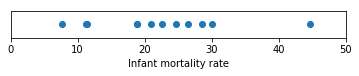

In [8]:
plt.figure(figsize=[6, 0.5])  # Make elongated figure
series = table_2['Infant mortality rate']
plt.plot(series, [0]*len(series), 'o')
plt.yticks([])  # Remove ticks on y-axis
plt.xlim(0,50)
plt.xlabel('Infant mortality rate')

In the case where there may be more than one observation for each value, the dots can be stacked
on top of each other to form a column. The data examined below, on piglet survival, is discrete. Here, the
concentration of data observations is indicated by the hight of the column. Such bar charts based on data range intervals are referred to as **histograms** (data intervals of 1).

In [9]:
table_3 = pd.DataFrame(
    {'Number of surviving piglets': range(5,15),
     'Frequency': [1, 0, 2, 3, 3, 9, 8, 5, 3, 2]}
).set_index('Number of surviving piglets')
table_3

Frequency
Number of surviving piglets           
5                                    1
6                                    0
7                                    2
8                                    3
9                                    3
10                                   9
11                                   8
12                                   5
13                                   3
14                                   2

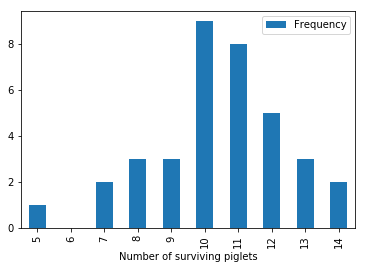

In [10]:
table_3.plot.bar()

In contrast to categorical data (e.g. the color of a flower), there are in general no natural categories to numerical observations. Instead, you must decide the data range interval you will use. Most common is to
use evenly spaced intervals, but the choice of the interval is yours. Choosing an inappropriate
interval, either too broad or too narrow, will make it difficult to get a good overview of the data
distribution using the histogram. 

The figures below investigate the same data of the age of pasangers on the Titanic.
The data set is plotted in histograms using different data intervals as indicated. 

In the upper histogram the intervals are large and much of the detail is lost (grouped into kids, adults, and seniors).
In lower histogram the intervals are small, so the data is not
presented in a summarized or smooth pattern; too many intervals have too few
data. There is no correct choice, however, and it is up to you decide
which intervals give you the best picture of the data distribution.

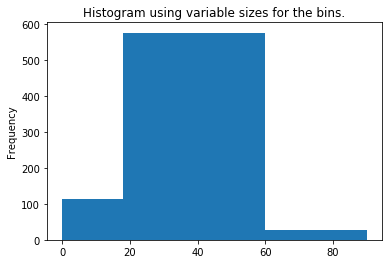

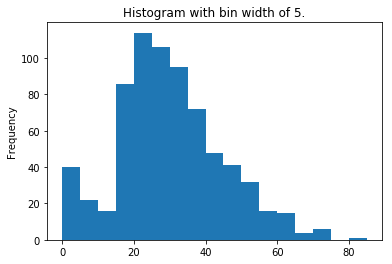

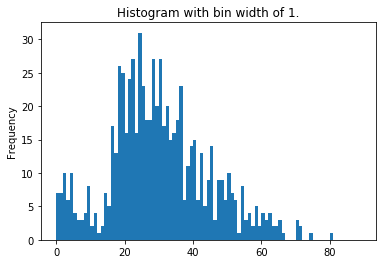

In [11]:
titanic = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv')

plt.figure()
plt.title(f'Histogram using variable sizes for the bins.')
titanic['Age'].plot.hist(bins=[0,18,60,90])
plt.show()

plt.figure()
start, stop, step = 0, 90, 5
titanic['Age'].plot.hist(bins=range(start, stop, step))
plt.title(f'Histogram with bin width of {step}.')
plt.show()

plt.figure()
start, stop, step = 0, 90, 1
titanic['Age'].plot.hist(bins=range(start, stop, step))
plt.title(f'Histogram with bin width of {step}.')
plt.show()

## Shapes of distributions
Now that we have learned different ways to plot and visualize data, we can
now start interpreting what we see. We can now start to look for characteristics
about the way the data are distributed.

Basically, we can learn about the way the data is distributed by the shape of
graphs like histograms. For example, we can find the area where there is the
most data located; this is referred to as the **mode**. Often this is located near the
center of the distribution and a distribution that has one such peak of
data is referred to as **unimodal**.

Text(10, 120, 'Left tail')

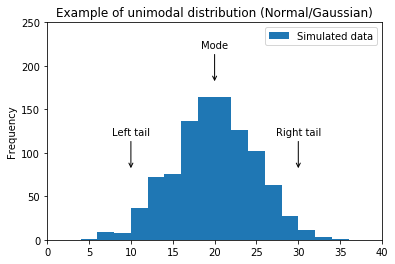

In [12]:
# Simulate and plot data of a unimodal distribution
from numpy.random import normal  # import normal distribution of random floating point numbers
simulated_data = normal(loc=20.0, scale=5.0, size=1000)  # Simulate data
df = pd.DataFrame({'Simulated data': simulated_data})
df.plot.hist(bins=range(0,40,2))  # Plot histogram of simulated data
plt.title('Example of unimodal distribution (Normal/Gaussian)')
plt.ylim(0,250)
plt.xlim(0,40)
plt.annotate(  # Show location of the mode
    'Mode',
    xy=(20,180), 
    xytext=(20,220),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
plt.annotate(  # Show location of the left tail
    'Right tail',
    xy=(30,80), 
    xytext=(30,120),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
plt.annotate(  # Show location of the right tail
    'Left tail',
    xy=(10,80), 
    xytext=(10,120),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)

If, however, there are two peaks of data, the distribution is referred to as **bimodal**.

(0, 40)

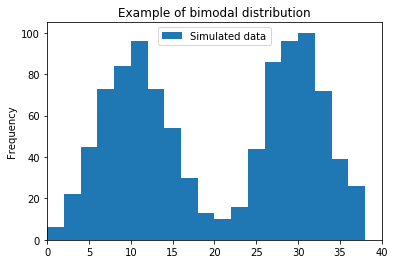

In [13]:
# Simulate and plot data of a unimodal distribution
from numpy.random import normal  # import normal distribution of random floating point numbers
simulated_data = list(normal(loc=10.0, scale=4.0, size=500))
simulated_data += list(normal(loc=30.0, scale=4.0, size=500))
df = pd.DataFrame({'Simulated data': simulated_data})
df.plot.hist(bins=range(0,40,2))  # Plot histogram of simulated data
plt.title('Example of bimodal distribution')
plt.xlim(0,40)

In addition to looking for whether the data is distributed with one or more mode, we can also
look at the symmetry of the distribution. If the shape of the curve is equal in both directions from
the mode, somewhat like a mirror image, then that distribution is referred to being **symmetric**. 
If, on the other hand, the distribution does not fall away from the mode in a balanced, symmetric
way, then the distribution is referred to as asymmetric or more commonly **skewed**.
The ends of the data, in both directions, are referred to as the tails and in a distribution skewed to
the right the right tail is pulled out further than the left. The opposite is the case in a
left skewed distribution.

(0, 8)

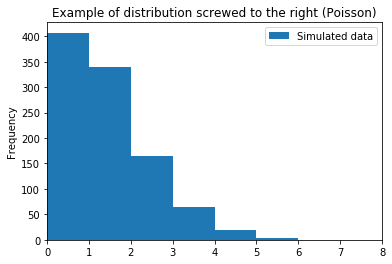

In [14]:
from numpy import random, arange  # import normal distribution of random integers
simulated_data = random.poisson(lam = 1.0, size=1000)
df = pd.DataFrame({'Simulated data': simulated_data})
df.plot.hist(bins=range(0,8,1))  # Plot histogram of simulated data
plt.title('Example of distribution screwed to the right (Poisson)')
plt.xlim(0,8)

In conclusion, by using graphical techniques to summarize data, both categorical and numerical, we make it
easier to understand the data collected as opposed to just looking at the numbers. 
For numerical data, we can also distribution. assess how the data is distributed using graphical techniques. These graphs provide insights that will be useful for deciding which mathematical models are appropriate for describing and modeling the data represented.

We will learn in the next chapter how to calculate some summary statistics from data sets that are
particular mathematical characteristics of the collected data sets. These mathematical values also
are essential parameters in the common mathematical distributions that we will learn to describe
the distribution of such data sets.

## Relational graphs

So far we have only be considering one data set (i.e., one variable at a time). It is worth
mentioning briefly that it is also useful to plot two (or more) data sets at the same time. This is
especially useful when you want to visually examine the relationship between two variables. The
types of graph that help display the relationships between two variables depend on the nature of
the data being compared. For example, if you two categorical variables such as the source of the
gut flora bacteria Escherichia. coli being compared at 3 different sites (Table 4), then a **stacked
bar chart** is a useful graphical representation.

In [15]:
# Frequency table of E. coli source by location
table_4 = pd.DataFrame(
    index = ['Chorro Creek', 'Los Osos Creek', 'Baywood'],
    data = {
        'Bird': [46, 79, 35],
        'Dimestic pet': [29, 56, 23],
        'Farm animal': [106, 32, 0],
        'Human': [38, 63, 60],
        'Terrestial mammal': [22, 26, 8]
    }
)
table_4

Bird  Dimestic pet  Farm animal  Human  Terrestial mammal
Chorro Creek      46            29          106     38                 22
Los Osos Creek    79            56           32     63                 26
Baywood           35            23            0     60                  8

Text(0, 0.5, 'Counts')

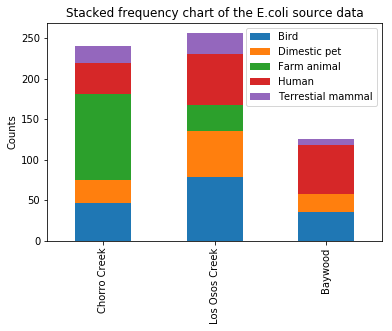

In [16]:
table_4.plot.bar(stacked=True)
plt.title('Stacked frequency chart of the E.coli source data')
plt.ylabel('Counts')

Alternatively, one of the variables (E. coli in this case) can be expressed as a percentage which then can be shown in a stacked relative frequency or bar chart. These types of graphs are good for showing whether the distributions of observations (counts or frequencies) are similar or different as a function of the other categorical
variable.

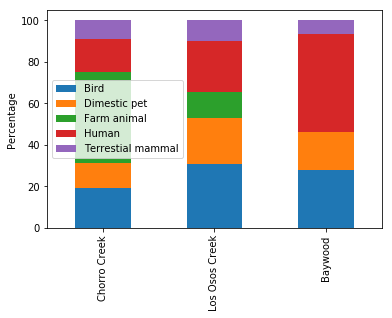

Bird  Dimestic pet  Farm animal      Human  \
Chorro Creek    19.087137     12.033195    43.983402  15.767635   
Los Osos Creek  30.859375     21.875000    12.500000  24.609375   
Baywood         27.777778     18.253968     0.000000  47.619048   

                Terrestial mammal  
Chorro Creek             9.128631  
Los Osos Creek          10.156250  
Baywood                  6.349206

In [17]:
sums = table_4.sum('columns')  # Compute sums
table_4_relative = table_4.divide(sums, axis='rows')  # Devide by the sums to get relative value
table_4_percent = table_4_relative*100  # Multiply all values by 100 to get value in percentages
table_4_percent.plot.bar(stacked=True)  # Make (stacked) bar plot
plt.ylabel('Percentage')
plt.show()
table_4_percent

If you have a numerical variable that you want to compare to a categorical variable, then one possibility is a **side-by-side dot plot**. As you learned above, the dot plot is a graphical way to
plot the location and distribution of numerical variables. Below is a side-
by-side dot plot of the ATP concentration in birch tree roots in a flooded area and for a control group (of the same size).

In [18]:
def side_by_side_dot_plot(df):
    ''' Side-by-side dot plot of a Pandas dataframe, df '''
    from numpy import ones
    from matplotlib.pyplot import xticks, xlim
    for idx, (label, series) in enumerate(df.iteritems()):
        plt.plot(ones(len(series))*idx, series, 'o')
    xticks(range(df.ndim),df.columns)
    xlim(-0.5,len(df.columns)-0.5)

Text(0, 0.5, 'ATP concentration in birch tree roots')

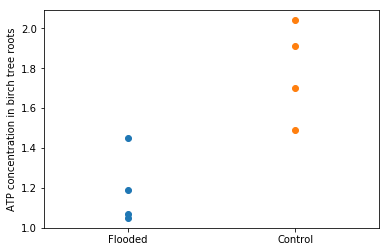

In [19]:
# ATP concentration in birch tree roots
df = pd.DataFrame({
    'Flooded': [1.45, 1.19, 1.05, 1.07],
    'Control': [1.70, 2.04, 1.49, 1.91]
})
side_by_side_dot_plot(df)
plt.ylabel('ATP concentration in birch tree roots')

*Outlook: The same data set is investigated below using a kernel density estimate (using the Gaussian distribution).*

For larger data sets of numerical variables, then **aligned histograms** are useful. Below is an example of selenium (Se) concentration measured in the teeth and liver of twenty Beluga whales caught in Canada.

In [20]:
table_5 = pd.DataFrame({
    'Liver Se': [6.23,  6.79,  7.92,  8.02,  9.34,
                 10.00, 10.57, 11.04, 12.36, 14.53,
                 15.28, 18.68, 22.08, 27.55, 32.83,
                 36.04, 37.74, 40.00, 41.23, 45.47],
    'Tooth Se': [140.16, 133.32, 135.34, 127.82, 108.67,
                146.22, 131.18, 145.51, 163.24, 136.55,
                112.63, 245.07, 140.48, 177.93, 160.73,
                227.60, 177.69, 174.23, 206.30, 141.31]
})
table_5

Liver Se  Tooth Se
0       6.23    140.16
1       6.79    133.32
2       7.92    135.34
3       8.02    127.82
4       9.34    108.67
5      10.00    146.22
6      10.57    131.18
7      11.04    145.51
8      12.36    163.24
9      14.53    136.55
10     15.28    112.63
11     18.68    245.07
12     22.08    140.48
13     27.55    177.93
14     32.83    160.73
15     36.04    227.60
16     37.74    177.69
17     40.00    174.23
18     41.23    206.30
19     45.47    141.31

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33c02de358>,
      dtype=object)

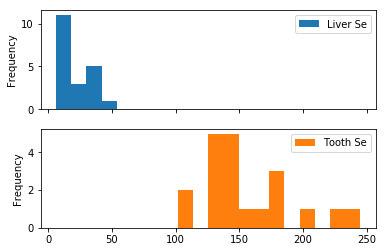

In [21]:
table_5.plot.hist(
    subplots=True,
    bins=20
)

Finally, if you are interested in comparing two numerical variables, then a **scatter plot** (or X-Y graph) is a good technique. In such a graph, the values of one variable is plotted along one axis
(X) and the value of another variable along the other axis (Y) for each observation (experimental
or study unit) in a study. Note, such a graph is only makes sense if the data comes from a study
where there are two (or more) variables measured for each observation; i.e., the data is paired.

In the following we investigate measurements of selenium (Se), a trace element that was measured in 20 white Beluga whales. Se concentrations were measured in both the tooth and the liver of
the whales; meassured in units of micrograms per gram and nanograms per gram, respectively. The researchers were interested in whether if you knew something about the Se concentration in the tooth (easy to measure) that you would have some idea about the Se concentration in the liver (hard to measure, but of more importance for the health of the whale).

A scatter plot of this data is shown in below where it looks like that there is some kind of
positive relationship between the two variables; i.e., that higher Se concentrations in teeth are
associated generally with higher concentrations of Se in the liver. The relationship is not perfect,
however, as there is a lot of “noise” or “messiness” in the plot. In later chapters we will introduce
statistical tools to help you describe and test this relationship, but for now, just look at and
interpret the graph. Note, each point in Figure represents an individual whale. Also
notice that Se concentration is measured on different numerical scales, even though the
measurements come from the same unit of study!

Text(0, 0.5, 'Tooth Se (mg/g)')

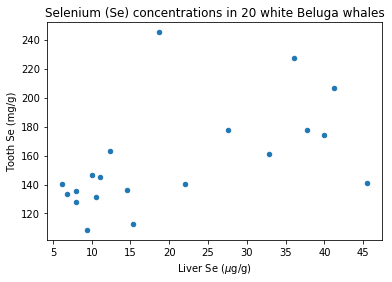

In [22]:
table_5.plot.scatter(
    x='Liver Se', 
    y='Tooth Se'
)
plt.title('Selenium (Se) concentrations in 20 white Beluga whales')
plt.xlabel('Liver Se ($\mu$g/g)')
plt.ylabel('Tooth Se (mg/g)')

Confused yet? Don’t worry, with practice, you will get it straight. Now at least you have learned
some ways to make graphs to help you visualize, present and interpret your data.

## References
Samuels, ML, JA Witmer and A Schaffner, 2012. Statistics for the Life Sciences, 4/E. Pearson.